# Prental depression exposure and hair cortisol at age 6


Hello there, here is a little playgroung for exploring the relationship between prenatal exposure to depression and a hair cortisol in 6 year-old children from the Generation R study (https://generationr.nl/). 


##### First, let's get the dependencies we need

In [1]:
# getting to the data
import os.path
import pyreadr

# data storage and handling
import pandas as pd; import numpy as np;

# plotting
import matplotlib.pyplot as plt; 
import seaborn as sns; sns.set(style="whitegrid",font_scale=2)
import ptitprince as pt
%matplotlib inline

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Point to the raw data
pathtodata = input("Enter the path to data: ")

# /Users/Serena/Desktop/CortisolData/

if os.path.exists(pathtodata) == False:
    pathtodata = input("Not quite, try again: ")

Enter the path to data: /Users/Serena/Desktop/CortisolData/


In [3]:
file = pyreadr.read_r(pathtodata + 'dataset_raw.Rds') # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = file[None] # extract the pandas data frame 
df.idc = pd.to_numeric(df.idc, downcast = 'integer')
df.index = df.idc
data = df.drop(['idc'], axis = 1)

<h3><center>Ok, let the plotting begin!</center></h3>

#### FANCY RAIN PLOTS 

In [4]:
g = data[['lncortisol', 'childRaceEth', 'bsiScoreFlg']]
g.shape

(2671, 3)

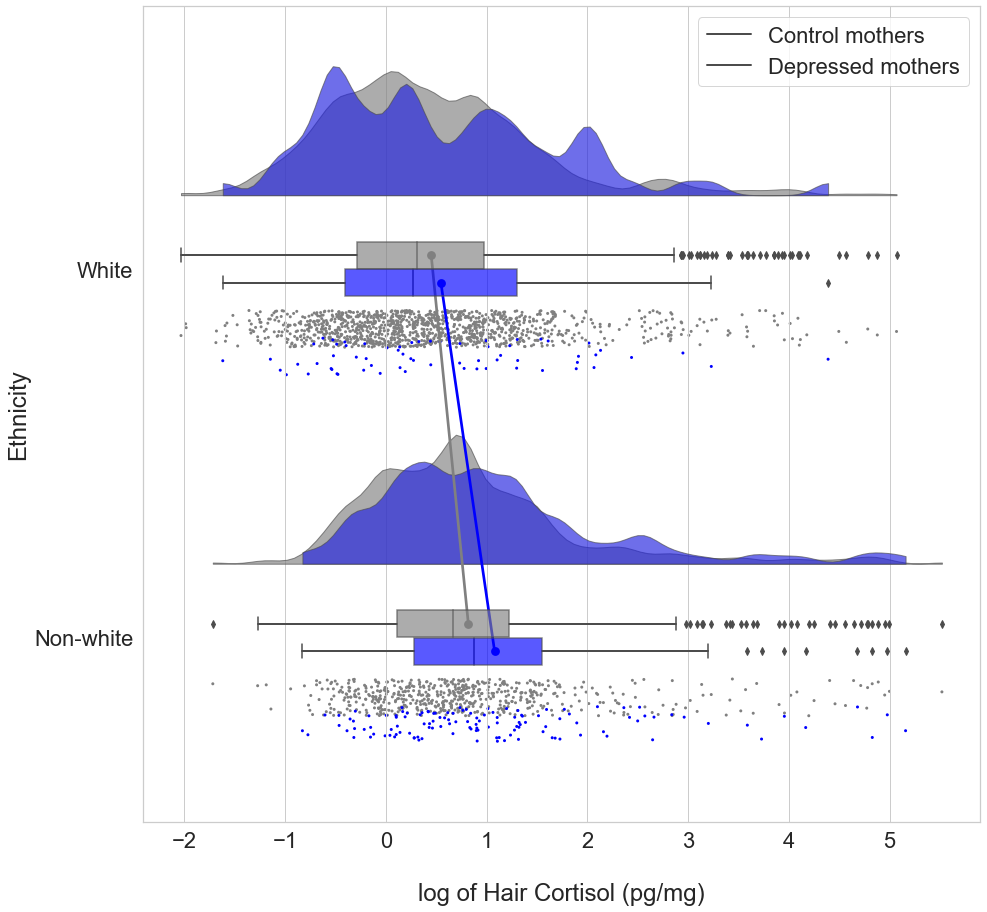

In [5]:
ort = "h"; pal = ['grey','blue']; sigma = .12

f, ax = plt.subplots(figsize=(15, 15))

ax = pt.RainCloud(x = g["childRaceEth"], y = g["lncortisol"], 
                  hue = g["bsiScoreFlg"], 
                  data = g, palette = pal, bw = sigma,
                 width_viol = .7, ax = ax, orient = ort, alpha = .65, 
                  dodge = True, pointplot = True, move = .2)

ax.legend(['Control mothers', 'Depressed mothers'])
ax.set_yticklabels(['White', 'Non-white'])
ax.set_ylabel("Ethnicity"); ax.set_xlabel("\nlog of Hair Cortisol (pg/mg)"); 

plt.savefig("rainplot",dpi = 300, edgecolorcolor = "white", 
          facecolor = "white", pad_inches=0.1, frameon=True)

#### SCATTERPLOTS

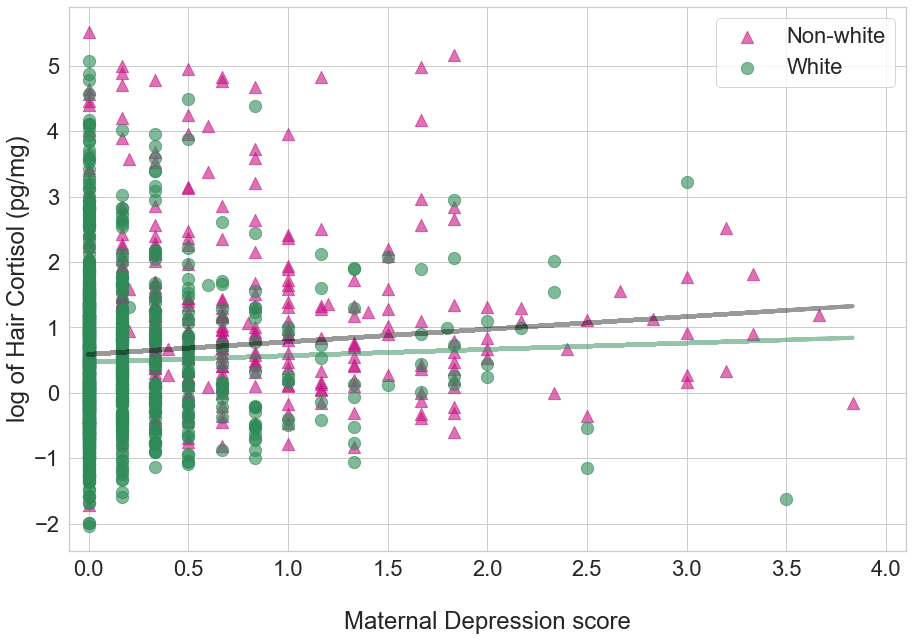

In [35]:
data["Ethnicity"] = ["Non-white" if  x == 1 else "White" for x in data['childRaceEth']]

f, ax2 = plt.subplots(figsize=(15, 10))

colors = { "Non-white":'mediumvioletred', "White" :'seagreen'}
markers = { "Non-white":'^', "White" :'o'}

plt.plot(data["bsiScore"], 0.09646028*data["bsiScore"] + 0.47266192, color = 'seagreen', alpha = 0.5, lw = 4)
plt.plot(data["bsiScore"], 0.1923598*data["bsiScore"] + 0.5887694, color = 'black', alpha = 0.4, lw = 4)

grouped = data.groupby('Ethnicity')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='bsiScore', y='lncortisol', marker = markers[key], s = 150,
               label= key, color=colors[key], alpha = 0.6)

plt.ylabel("log of Hair Cortisol (pg/mg)"); plt.xlabel("\nMaternal Depression score")
plt.xlim(-0.1, 4.1)

plt.savefig("scatterplot",dpi = 300, edgecolorcolor = "white", 
           facecolor = "white", pad_inches=0.1, frameon=True)